# FbProphet

In [1]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ex_rate = pd.read_excel("C:/Users/Irfan Shaik/Documents/ExcelR Project/DEXINUS (1).xls")
ex_rate.head

<bound method NDFrame.head of       observation_date  DEXINUS
0           1973-01-02     8.02
1           1973-01-03     8.02
2           1973-01-04     8.00
3           1973-01-05     8.01
4           1973-01-08     8.00
...                ...      ...
12644       2021-06-21    74.18
12645       2021-06-22    74.37
12646       2021-06-23    74.13
12647       2021-06-24    74.14
12648       2021-06-25    74.14

[12649 rows x 2 columns]>

In [3]:
ex_rate.columns = ['ds','y']
ex_rate.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [4]:
ex_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      12649 non-null  datetime64[ns]
 1   y       12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [5]:
ex_rate.isnull().sum()

ds      0
y     494
dtype: int64

In [6]:
ex_rate = ex_rate.interpolate(method = 'linear')
ex_rate

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [7]:
ex_rate.isnull().sum()

ds    0
y     0
dtype: int64

In [8]:
from fbprophet import Prophet

In [9]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

### Model Building

In [10]:
# Initialize the model
model = Prophet()

In [11]:
model.fit(ex_rate)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [13]:
# creating future dates of 365 days
future_dates = model.make_future_dataframe(periods=30)

In [14]:
ex_rate.tail()

,ds,y
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [15]:
future_dates.tail()

,ds
12674,2021-07-21
12675,2021-07-22
12676,2021-07-23
12677,2021-07-24
12678,2021-07-25


### Predictions on Future data

In [16]:
prediction = model.predict(future_dates)

In [17]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1973-01-02,7.540611,5.316164,9.736943,7.540611,7.540611,-0.045652,-0.045652,-0.045652,-0.084862,-0.084862,-0.084862,0.039210,0.039210,0.039210,0.0,0.0,0.0,7.494959
1,1973-01-03,7.541818,5.360535,9.822746,7.541818,7.541818,-0.055282,-0.055282,-0.055282,-0.089727,-0.089727,-0.089727,0.034446,0.034446,0.034446,0.0,0.0,0.0,7.486537
2,1973-01-04,7.543025,5.263671,9.753740,7.543025,7.543025,-0.060723,-0.060723,-0.060723,-0.090075,-0.090075,-0.090075,0.029352,0.029352,0.029352,0.0,0.0,0.0,7.482302
3,1973-01-05,7.544233,5.147960,9.575422,7.544233,7.544233,-0.077277,-0.077277,-0.077277,-0.101214,-0.101214,-0.101214,0.023936,0.023936,0.023936,0.0,0.0,0.0,7.466955
4,1973-01-08,7.547854,5.228898,9.536752,7.547854,7.547854,-0.081370,-0.081370,-0.081370,-0.087355,-0.087355,-0.087355,0.005985,0.005985,0.005985,0.0,0.0,0.0,7.466484


In [18]:
prediction[['ds','yhat_lower','yhat_upper','yhat']].tail(30)

,ds,yhat_lower,yhat_upper,yhat
12649,2021-06-26,74.468913,79.065913,76.813070
12650,2021-06-27,74.410883,78.964113,76.828921
12651,2021-06-28,74.387568,78.947222,76.530042
12652,2021-06-29,74.337920,78.729546,76.546741
12653,2021-06-30,74.356708,78.750178,76.555086
12654,2021-07-01,74.394859,78.798964,76.566857
12655,2021-07-02,74.412875,78.756577,76.566673
12656,2021-07-03,74.793264,79.114480,76.904244
12657,2021-07-04,74.672747,78.845814,76.912740
12658,2021-07-05,74.355636,78.748245,76.606016


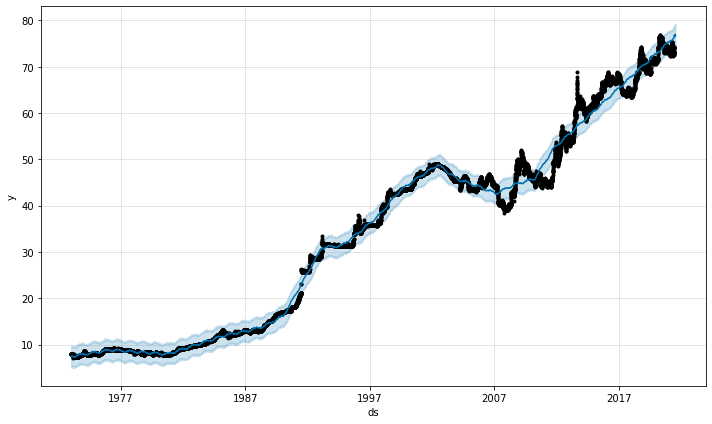

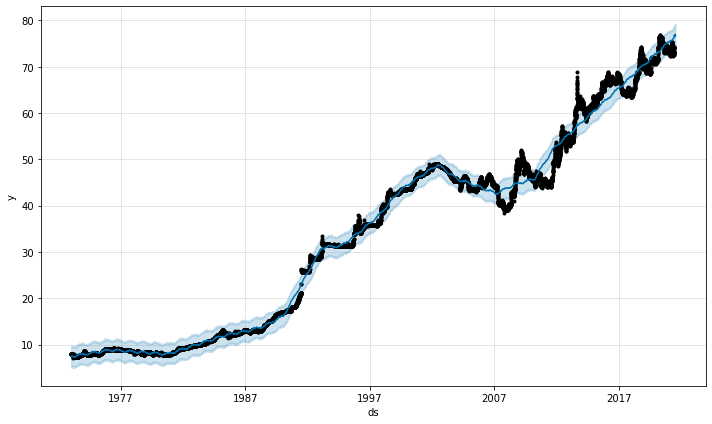

In [19]:
model.plot(prediction)

 - In the above graph The light blue color indicating the upper and lower yhat levels, the dark blue color indicating the predicted values(yhat) and the black color line indicating the original data. We can see that the predicted data is close to the actual data. In the last 30 days we can observe that our model is predicted well. 

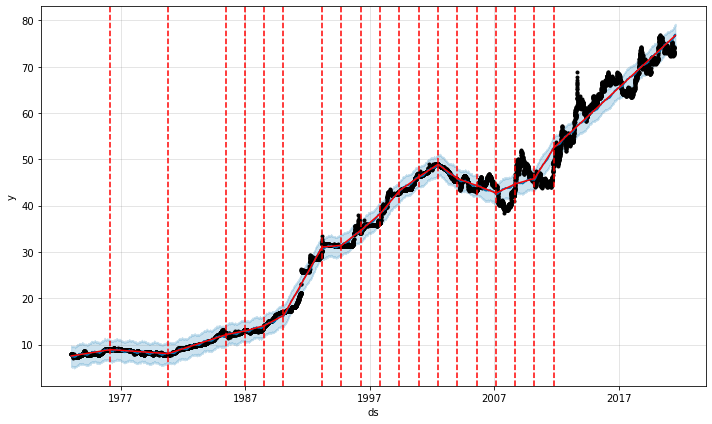

In [20]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

 - The red dotted lines shows the rapid time change in the trend of dollar exchange rate. 

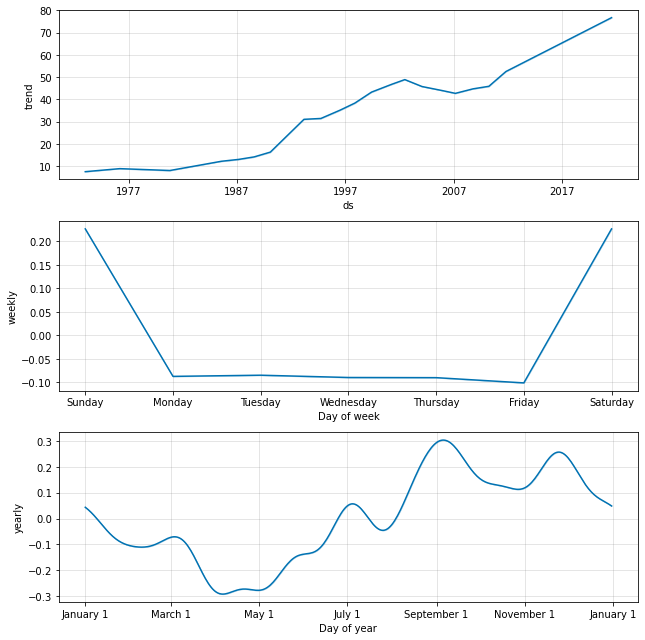

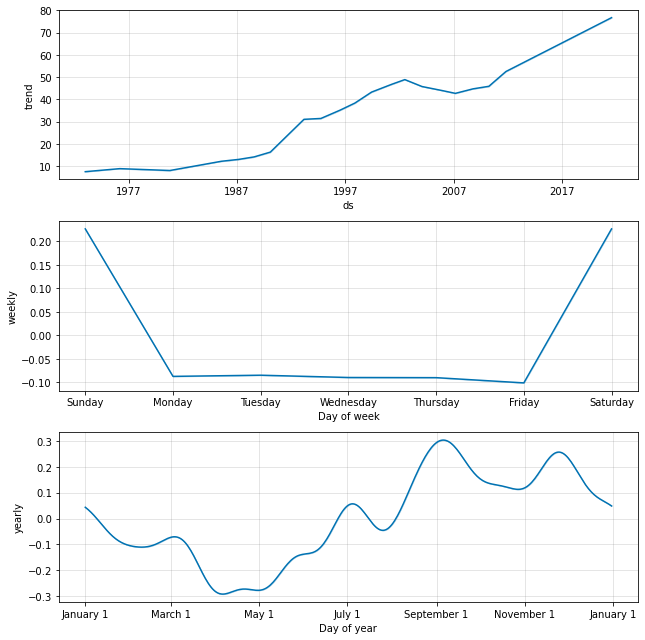

In [21]:
### Visualize each and components[Trends - weekly,yearly]
model.plot_components(prediction)

In [22]:
d = prediction.set_index('ds')[['yhat']].join(ex_rate.set_index('ds').y).reset_index()
d.tail()

,ds,yhat,y
12674,2021-07-21,76.622353,NaN
12675,2021-07-22,76.624206,NaN
12676,2021-07-23,76.616210,NaN
12677,2021-07-24,76.948209,NaN
12678,2021-07-25,76.953469,NaN


In [23]:
d.isnull().sum()

ds       0
yhat     0
y       30
dtype: int64

In [24]:
# Removing the null values
d.dropna(inplace = True)
d.isnull().sum()

ds      0
yhat    0
y       0
dtype: int64

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [27]:
mean_squared_error(d.y, d.yhat)

2.9410070369298498

In [28]:
mean_absolute_error(d.y, d.yhat)

1.1181786344061688

In [34]:
def mean_absolute_percentage_error(org, pred): 
    return np.mean(np.abs((org-pred)/org))*100
    
mean_absolute_percentage_error(org = d['y'], pred = d['yhat'])

3.218788996668351

## Cross-validate the model

In [35]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='8854 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 48 forecasts with cutoffs between 1997-04-27 00:00:00 and 2020-06-25 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1997-04-28,36.013758,35.308098,36.768751,35.77,1997-04-27
1,1997-04-29,36.014453,35.343559,36.798705,35.77,1997-04-27
2,1997-04-30,36.013751,35.321503,36.748043,35.78,1997-04-27
3,1997-05-01,36.016374,35.309515,36.706188,35.77,1997-04-27
4,1997-05-02,36.019354,35.339220,36.714252,35.76,1997-04-27


In [40]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,13.388366,3.659012,2.710099,0.051570,0.042016,0.052293,0.388889
1,38 days,13.376670,3.657413,2.709099,0.051580,0.042016,0.052296,0.390488
2,39 days,13.410173,3.661990,2.705782,0.051525,0.041863,0.052252,0.394179
3,40 days,13.414685,3.662606,2.707006,0.051594,0.042016,0.052323,0.395204
4,41 days,13.492871,3.673264,2.719303,0.051836,0.042016,0.052576,0.393103


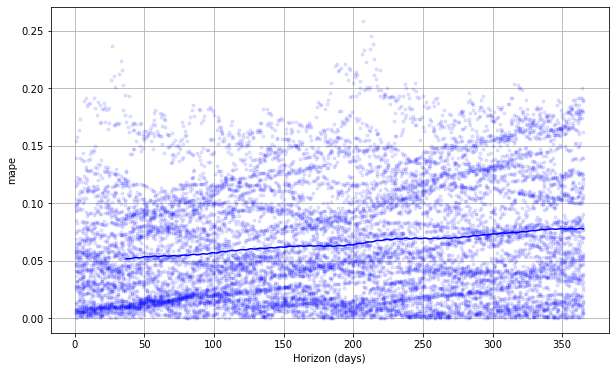

In [41]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')